In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
from glob import glob
import os
import seaborn as sns
import xarray as xr

import matplotlib.pyplot as plt

sns.set(font="Helvetica")

seas = "mam"

In [2]:
diri = r'/Users/fadhlilrizki/Documents/PhD/thesis/dataout/'
diro = r'/Users/fadhlilrizki/Documents/PhD/thesis/figures/stats/'

In [29]:
ds_TE = xr.open_dataset(diri+"combined_wave_extreme_TopEnd_"+seas+".nc")
ds_TE

<xarray.Dataset>
Dimensions:    (list: 50, ncl1: 50)
Dimensions without coordinates: list, ncl1
Data variables:
    composite  (list) float32 ...
    median     (ncl1) float32 ...
    alpha      (list) float32 ...

In [30]:
combination = ["er_er_drydry",
               "er_er_wet_wet",
               
               "er_klv_drydry",
               "er_klv_drywet",
               "er_klv_wetdry",
               "er_klv_wetwet",
               
               "er_mjo_drydry",
               "er_mjo_drywet",
               "er_mjo_wetdry",
               "er_mjo_wetwet",
               
               "er_mrg_drydry",
               "er_mrg_drywet",
               "er_mrg_wetdry",
               "er_mrg_wetwet",
               
               "er_td_drydry",
               "er_td_drywet",
               "er_td_wetdry",
               "er_td_wetwet",
               
               "klv_klv_drydry",
               "klv_klv_wet_wet",
               
               "mjo_klv_drydry",
               "mjo_klv_drywet",
               "mjo_klv_wetdry",
               "mjo_klv_wetwet",
               
               "mjo_mjo_drydry",
               "mjo_mjo_wetwet",   
               
               "mrg_klv_drydry",
               "mrg_klv_drywet",
               "mrg_klv_wetdry",
               "mrg_klv_wetwet",
               
               "mrg_mjo_drydry",
               "mrg_mjo_drywet",
               "mrg_mjo_wetdry",
               "mrg_mjo_wetwet",
               
               "mrg_mrg_drydry",
               "mrg_mrg_wetwet",
               
               "mrg_td_drydry",
               "mrg_td_drywet",
               "mrg_td_wetdry",
               "mrg_td_wetwet",
               
               'td_klv_drydry',
               'td_klv_drywet',
               'td_klv_wetdry',
               'td_klv_wetwet',
               
               'td_mjo_drydry',
               'td_mjo_drywet',
               'td_mjo_wetdry',
               'td_mjo_wetwet',
               
               'td_td_drydry',
               'td_td_wetwet',
               
              ]

len(combination)

50

In [31]:
c = ds_TE["composite"]
a = ds_TE["alpha"]
ndays = ds_TE["composite"].attrs["ndays"]
ndays
# attrs["ndays"]

array([1539,  282,  509,  105,   80,   22,  777,  137,  153,   33,  239,
        238,   38,   50,  468,  362,   92,   65,  951,  225,  433,  108,
         98,   20, 1415,  280,  124,   33,  142,   35,  196,   45,  241,
         43,  410,  460,  150,   90,  175,   81,  248,   60,  200,   59,
        397,   95,  307,   73,  827,  649], dtype=int32)

In [32]:
cols = ["er-wet", "klv-wet", "mjo-wet", "mrg-wet", "td-wet", "er-dry", "klv-dry", "mjo-dry", "mrg-dry", "td-dry"]

In [33]:
rows = cols


In [34]:
df = []
counter = 0
for i in combination:
    val = c.values[counter]
    df.append(val)
    counter+=1
    
df = pd.DataFrame([df,combination]).transpose()
df = df.rename(columns={0:"prec",1:"combination"})

df["prec"] = df["prec"].astype(float)
df["prec"]

0     0.434277
1     2.552357
2     0.505027
3     0.000000
4     1.285294
5     4.673797
6     0.198501
7     1.876342
8     1.344098
9     9.347594
10    0.215112
11    1.080079
12    0.000000
13    5.141177
14    0.219708
15    1.136172
16    1.117647
17    6.327602
18    0.432486
19    0.913987
20    0.356202
21    0.000000
22    0.524610
23    5.141177
24    0.399667
25    2.570588
26    0.000000
27    0.000000
28    1.086164
29    2.937815
30    0.000000
31    0.000000
32    1.066634
33    4.782490
34    0.250789
35    1.452941
36    0.000000
37    1.142484
38    0.881344
39    3.808279
40    0.207306
41    1.713726
42    1.542353
43    0.871386
44    0.129501
45    1.623529
46    1.004790
47    7.042707
48    0.435166
49    1.821989
Name: prec, dtype: float64

In [35]:
df_a = []
counter = 0
for i in combination:
    val = a.values[counter]
    df_a.append(val)
    counter+=1
    
df_a = pd.DataFrame([df_a,combination]).transpose()
df_a = df_a.rename(columns={0:"alpha",1:"combination"})

df_a["alpha"] = df_a["alpha"].astype(float)
df_a["alpha"]

0     1.0
1     1.0
2     0.0
3     1.0
4     0.0
5     1.0
6     1.0
7     0.0
8     0.0
9     1.0
10    1.0
11    0.0
12    1.0
13    1.0
14    1.0
15    0.0
16    0.0
17    1.0
18    1.0
19    0.0
20    1.0
21    1.0
22    0.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    0.0
29    0.0
30    1.0
31    1.0
32    0.0
33    1.0
34    1.0
35    0.0
36    1.0
37    0.0
38    0.0
39    1.0
40    1.0
41    0.0
42    0.0
43    0.0
44    1.0
45    0.0
46    0.0
47    1.0
48    1.0
49    1.0
Name: alpha, dtype: float64

In [36]:
df_n = []
counter = 0
for i in combination:
    val = ndays[counter]
    df_n.append(val)
    counter+=1
    
df_n = pd.DataFrame([df_n,combination]).transpose()
df_n = df_n.rename(columns={0:"ndays",1:"combination"})

df_n["ndays"] = df_n["ndays"].astype(float)
df_n

,ndays,combination
0,1539.0,er_er_drydry
1,282.0,er_er_wet_wet
2,509.0,er_klv_drydry
3,105.0,er_klv_drywet
4,80.0,er_klv_wetdry
5,22.0,er_klv_wetwet
6,777.0,er_mjo_drydry
7,137.0,er_mjo_drywet
8,153.0,er_mjo_wetdry
9,33.0,er_mjo_wetwet


In [37]:
# df["prec"] = [df["prec"].iloc[i].astype(float) for i in range(len(df["prec"]))]

In [38]:
x = pd.DataFrame(columns=cols, index=rows)
a = pd.DataFrame(columns=cols, index=rows)
n = pd.DataFrame(columns=cols, index=rows)

In [39]:

x.loc["er-dry","er-dry"] = df["prec"].loc[0].astype(float)
x.loc["er-wet","er-wet"] = df["prec"].loc[1].astype(float)

#erklv
x.loc["er-dry","klv-dry"] = df["prec"].loc[2].astype(float)
x.loc["er-dry","klv-wet"] = df["prec"].loc[3].astype(float)
x.loc["er-wet","klv-dry"] = df["prec"].loc[4].astype(float)
x.loc["er-wet","klv-wet"] = df["prec"].loc[5].astype(float)

x.loc["klv-dry","er-dry"] = df["prec"].loc[2].astype(float)
x.loc["klv-wet","er-dry"] = df["prec"].loc[3].astype(float)
x.loc["klv-dry","er-wet"] = df["prec"].loc[4].astype(float)
x.loc["klv-wet","er-wet"] = df["prec"].loc[5].astype(float)

#ermjo
x.loc["er-dry","mjo-dry"] = df["prec"].loc[6].astype(float)
x.loc["er-dry","mjo-wet"] = df["prec"].loc[7].astype(float)
x.loc["er-wet","mjo-dry"] = df["prec"].loc[8].astype(float)
x.loc["er-wet","mjo-wet"] = df["prec"].loc[9].astype(float)

x.loc["mjo-dry","er-dry"] = df["prec"].loc[6].astype(float)
x.loc["mjo-wet","er-dry"] = df["prec"].loc[7].astype(float)
x.loc["mjo-dry","er-wet"] = df["prec"].loc[8].astype(float)
x.loc["mjo-wet","er-wet"] = df["prec"].loc[9].astype(float)

#ermrg
x.loc["er-dry","mrg-dry"] = df["prec"].loc[10].astype(float)
x.loc["er-dry","mrg-wet"] = df["prec"].loc[11].astype(float)
x.loc["er-wet","mrg-dry"] = df["prec"].loc[12].astype(float)
x.loc["er-wet","mrg-wet"] = df["prec"].loc[13].astype(float)

x.loc["mrg-dry","er-dry"] = df["prec"].loc[10].astype(float)
x.loc["mrg-wet","er-dry"] = df["prec"].loc[11].astype(float)
x.loc["mrg-dry","er-wet"] = df["prec"].loc[12].astype(float)
x.loc["mrg-wet","er-wet"] = df["prec"].loc[13].astype(float)

#ertd
x.loc["er-dry","td-dry"] = df["prec"].loc[14].astype(float)
x.loc["er-dry","td-wet"] = df["prec"].loc[15].astype(float)
x.loc["er-wet","td-dry"] = df["prec"].loc[16].astype(float)
x.loc["er-wet","td-wet"] = df["prec"].loc[17].astype(float)

x.loc["td-dry","er-dry"] = df["prec"].loc[14].astype(float)
x.loc["td-wet","er-dry"] = df["prec"].loc[15].astype(float)
x.loc["td-dry","er-wet"] = df["prec"].loc[16].astype(float)
x.loc["td-wet","er-wet"] = df["prec"].loc[17].astype(float)


#klvklv
x.loc["klv-dry","klv-dry"] = df["prec"].loc[18].astype(float)
x.loc["klv-wet","klv-wet"] = df["prec"].loc[19].astype(float)

#mjoklv
x.loc["mjo-dry","klv-dry"] = df["prec"].loc[20].astype(float)
x.loc["mjo-dry","klv-wet"] = df["prec"].loc[21].astype(float)
x.loc["mjo-wet","klv-dry"] = df["prec"].loc[22].astype(float)
x.loc["mjo-wet","klv-wet"] = df["prec"].loc[23].astype(float)

x.loc["klv-dry","mjo-dry"] = df["prec"].loc[20].astype(float)
x.loc["klv-wet","mjo-dry"] = df["prec"].loc[21].astype(float)
x.loc["klv-dry","mjo-wet"] = df["prec"].loc[22].astype(float)
x.loc["klv-wet","mjo-wet"] = df["prec"].loc[23].astype(float)

#mjomjo
x.loc["mjo-dry","mjo-dry"] = df["prec"].loc[24].astype(float)
x.loc["mjo-wet","mjo-wet"] = df["prec"].loc[25].astype(float)

#mrgklv
x.loc["mrg-dry","klv-dry"] = df["prec"].loc[26].astype(float)
x.loc["mrg-dry","klv-wet"] = df["prec"].loc[27].astype(float)
x.loc["mrg-wet","klv-dry"] = df["prec"].loc[28].astype(float)
x.loc["mrg-wet","klv-wet"] = df["prec"].loc[29].astype(float)

x.loc["klv-dry","mrg-dry"] = df["prec"].loc[26].astype(float)
x.loc["klv-wet","mrg-dry"] = df["prec"].loc[27].astype(float)
x.loc["klv-dry","mrg-wet"] = df["prec"].loc[28].astype(float)
x.loc["klv-wet","mrg-wet"] = df["prec"].loc[29].astype(float)

#mrgmjo
x.loc["mrg-dry","mjo-dry"] = df["prec"].loc[30].astype(float)
x.loc["mrg-dry","mjo-wet"] = df["prec"].loc[31].astype(float)
x.loc["mrg-wet","mjo-dry"] = df["prec"].loc[32].astype(float)
x.loc["mrg-wet","mjo-wet"] = df["prec"].loc[33].astype(float)

x.loc["mjo-dry","mrg-dry"] = df["prec"].loc[30].astype(float)
x.loc["mjo-wet","mrg-dry"] = df["prec"].loc[31].astype(float)
x.loc["mjo-dry","mrg-wet"] = df["prec"].loc[32].astype(float)
x.loc["mjo-wet","mrg-wet"] = df["prec"].loc[33].astype(float)

#mrgmrg
x.loc["mrg-dry","mrg-dry"] = df["prec"].loc[34].astype(float)
x.loc["mrg-wet","mrg-wet"] = df["prec"].loc[35].astype(float)

#mrgtd
x.loc["mrg-dry","td-dry"] = df["prec"].loc[36].astype(float)
x.loc["mrg-dry","td-wet"] = df["prec"].loc[37].astype(float)
x.loc["mrg-wet","td-dry"] = df["prec"].loc[38].astype(float)
x.loc["mrg-wet","td-wet"] = df["prec"].loc[39].astype(float)

x.loc["td-dry","mrg-dry"] = df["prec"].loc[36].astype(float)
x.loc["td-wet","mrg-dry"] = df["prec"].loc[37].astype(float)
x.loc["td-dry","mrg-wet"] = df["prec"].loc[38].astype(float)
x.loc["td-wet","mrg-wet"] = df["prec"].loc[39].astype(float)

#tdklv
x.loc["td-dry","klv-dry"] = df["prec"].loc[40].astype(float)
x.loc["td-dry","klv-wet"] = df["prec"].loc[41].astype(float)
x.loc["td-wet","klv-dry"] = df["prec"].loc[42].astype(float)
x.loc["td-wet","klv-wet"] = df["prec"].loc[43].astype(float)

x.loc["klv-dry","td-dry"] = df["prec"].loc[40].astype(float)
x.loc["klv-wet","td-dry"] = df["prec"].loc[41].astype(float)
x.loc["klv-dry","td-wet"] = df["prec"].loc[42].astype(float)
x.loc["klv-wet","td-wet"] = df["prec"].loc[43].astype(float)

#tdmjo
x.loc["td-dry","mjo-dry"] = df["prec"].loc[44].astype(float)
x.loc["td-dry","mjo-wet"] = df["prec"].loc[45].astype(float)
x.loc["td-wet","mjo-dry"] = df["prec"].loc[46].astype(float)
x.loc["td-wet","mjo-wet"] = df["prec"].loc[47].astype(float)

x.loc["mjo-dry","td-dry"] = df["prec"].loc[44].astype(float)
x.loc["mjo-wet","td-dry"] = df["prec"].loc[45].astype(float)
x.loc["mjo-dry","td-wet"] = df["prec"].loc[46].astype(float)
x.loc["mjo-wet","td-wet"] = df["prec"].loc[47].astype(float)

#tdtd
x.loc["td-dry","td-dry"] = df["prec"].loc[48].astype(float)
x.loc["td-wet","td-wet"] = df["prec"].loc[49].astype(float)

In [40]:

a.loc["er-dry","er-dry"] = df_a["alpha"].loc[0].astype(float)
a.loc["er-wet","er-wet"] = df_a["alpha"].loc[1].astype(float)

#erklv
a.loc["er-dry","klv-dry"] = df_a["alpha"].loc[2].astype(float)
a.loc["er-dry","klv-wet"] = df_a["alpha"].loc[3].astype(float)
a.loc["er-wet","klv-dry"] = df_a["alpha"].loc[4].astype(float)
a.loc["er-wet","klv-wet"] = df_a["alpha"].loc[5].astype(float)

a.loc["klv-dry","er-dry"] = df_a["alpha"].loc[2].astype(float)
a.loc["klv-wet","er-dry"] = df_a["alpha"].loc[3].astype(float)
a.loc["klv-dry","er-wet"] = df_a["alpha"].loc[4].astype(float)
a.loc["klv-wet","er-wet"] = df_a["alpha"].loc[5].astype(float)

#ermjo
a.loc["er-dry","mjo-dry"] = df_a["alpha"].loc[6].astype(float)
a.loc["er-dry","mjo-wet"] = df_a["alpha"].loc[7].astype(float)
a.loc["er-wet","mjo-dry"] = df_a["alpha"].loc[8].astype(float)
a.loc["er-wet","mjo-wet"] = df_a["alpha"].loc[9].astype(float)

a.loc["mjo-dry","er-dry"] = df_a["alpha"].loc[6].astype(float)
a.loc["mjo-wet","er-dry"] = df_a["alpha"].loc[7].astype(float)
a.loc["mjo-dry","er-wet"] = df_a["alpha"].loc[8].astype(float)
a.loc["mjo-wet","er-wet"] = df_a["alpha"].loc[9].astype(float)

#ermrg
a.loc["er-dry","mrg-dry"] = df_a["alpha"].loc[10].astype(float)
a.loc["er-dry","mrg-wet"] = df_a["alpha"].loc[11].astype(float)
a.loc["er-wet","mrg-dry"] = df_a["alpha"].loc[12].astype(float)
a.loc["er-wet","mrg-wet"] = df_a["alpha"].loc[13].astype(float)

a.loc["mrg-dry","er-dry"] = df_a["alpha"].loc[10].astype(float)
a.loc["mrg-wet","er-dry"] = df_a["alpha"].loc[11].astype(float)
a.loc["mrg-dry","er-wet"] = df_a["alpha"].loc[12].astype(float)
a.loc["mrg-wet","er-wet"] = df_a["alpha"].loc[13].astype(float)

#ertd
a.loc["er-dry","td-dry"] = df_a["alpha"].loc[14].astype(float)
a.loc["er-dry","td-wet"] = df_a["alpha"].loc[15].astype(float)
a.loc["er-wet","td-dry"] = df_a["alpha"].loc[16].astype(float)
a.loc["er-wet","td-wet"] = df_a["alpha"].loc[17].astype(float)

a.loc["td-dry","er-dry"] = df_a["alpha"].loc[14].astype(float)
a.loc["td-wet","er-dry"] = df_a["alpha"].loc[15].astype(float)
a.loc["td-dry","er-wet"] = df_a["alpha"].loc[16].astype(float)
a.loc["td-wet","er-wet"] = df_a["alpha"].loc[17].astype(float)


#klvklv
a.loc["klv-dry","klv-dry"] = df_a["alpha"].loc[18].astype(float)
a.loc["klv-wet","klv-wet"] = df_a["alpha"].loc[19].astype(float)

#mjoklv
a.loc["mjo-dry","klv-dry"] = df_a["alpha"].loc[20].astype(float)
a.loc["mjo-dry","klv-wet"] = df_a["alpha"].loc[21].astype(float)
a.loc["mjo-wet","klv-dry"] = df_a["alpha"].loc[22].astype(float)
a.loc["mjo-wet","klv-wet"] = df_a["alpha"].loc[23].astype(float)

a.loc["klv-dry","mjo-dry"] = df_a["alpha"].loc[20].astype(float)
a.loc["klv-wet","mjo-dry"] = df_a["alpha"].loc[21].astype(float)
a.loc["klv-dry","mjo-wet"] = df_a["alpha"].loc[22].astype(float)
a.loc["klv-wet","mjo-wet"] = df_a["alpha"].loc[23].astype(float)

#mjomjo
a.loc["mjo-dry","mjo-dry"] = df_a["alpha"].loc[24].astype(float)
a.loc["mjo-wet","mjo-wet"] = df_a["alpha"].loc[25].astype(float)

#mrgklv
a.loc["mrg-dry","klv-dry"] = df_a["alpha"].loc[26].astype(float)
a.loc["mrg-dry","klv-wet"] = df_a["alpha"].loc[27].astype(float)
a.loc["mrg-wet","klv-dry"] = df_a["alpha"].loc[28].astype(float)
a.loc["mrg-wet","klv-wet"] = df_a["alpha"].loc[29].astype(float)

a.loc["klv-dry","mrg-dry"] = df_a["alpha"].loc[26].astype(float)
a.loc["klv-wet","mrg-dry"] = df_a["alpha"].loc[27].astype(float)
a.loc["klv-dry","mrg-wet"] = df_a["alpha"].loc[28].astype(float)
a.loc["klv-wet","mrg-wet"] = df_a["alpha"].loc[29].astype(float)

#mrgmjo
a.loc["mrg-dry","mjo-dry"] = df_a["alpha"].loc[30].astype(float)
a.loc["mrg-dry","mjo-wet"] = df_a["alpha"].loc[31].astype(float)
a.loc["mrg-wet","mjo-dry"] = df_a["alpha"].loc[32].astype(float)
a.loc["mrg-wet","mjo-wet"] = df_a["alpha"].loc[33].astype(float)

a.loc["mjo-dry","mrg-dry"] = df_a["alpha"].loc[30].astype(float)
a.loc["mjo-wet","mrg-dry"] = df_a["alpha"].loc[31].astype(float)
a.loc["mjo-dry","mrg-wet"] = df_a["alpha"].loc[32].astype(float)
a.loc["mjo-wet","mrg-wet"] = df_a["alpha"].loc[33].astype(float)

#mrgmrg
a.loc["mrg-dry","mrg-dry"] = df_a["alpha"].loc[34].astype(float)
a.loc["mrg-wet","mrg-wet"] = df_a["alpha"].loc[35].astype(float)

#mrgtd
a.loc["mrg-dry","td-dry"] = df_a["alpha"].loc[36].astype(float)
a.loc["mrg-dry","td-wet"] = df_a["alpha"].loc[37].astype(float)
a.loc["mrg-wet","td-dry"] = df_a["alpha"].loc[38].astype(float)
a.loc["mrg-wet","td-wet"] = df_a["alpha"].loc[39].astype(float)

a.loc["td-dry","mrg-dry"] = df_a["alpha"].loc[36].astype(float)
a.loc["td-wet","mrg-dry"] = df_a["alpha"].loc[37].astype(float)
a.loc["td-dry","mrg-wet"] = df_a["alpha"].loc[38].astype(float)
a.loc["td-wet","mrg-wet"] = df_a["alpha"].loc[39].astype(float)

#tdklv
a.loc["td-dry","klv-dry"] = df_a["alpha"].loc[40].astype(float)
a.loc["td-dry","klv-wet"] = df_a["alpha"].loc[41].astype(float)
a.loc["td-wet","klv-dry"] = df_a["alpha"].loc[42].astype(float)
a.loc["td-wet","klv-wet"] = df_a["alpha"].loc[43].astype(float)

a.loc["klv-dry","td-dry"] = df_a["alpha"].loc[40].astype(float)
a.loc["klv-wet","td-dry"] = df_a["alpha"].loc[41].astype(float)
a.loc["klv-dry","td-wet"] = df_a["alpha"].loc[42].astype(float)
a.loc["klv-wet","td-wet"] = df_a["alpha"].loc[43].astype(float)

#tdmjo
a.loc["td-dry","mjo-dry"] = df_a["alpha"].loc[44].astype(float)
a.loc["td-dry","mjo-wet"] = df_a["alpha"].loc[45].astype(float)
a.loc["td-wet","mjo-dry"] = df_a["alpha"].loc[46].astype(float)
a.loc["td-wet","mjo-wet"] = df_a["alpha"].loc[47].astype(float)

a.loc["mjo-dry","td-dry"] = df_a["alpha"].loc[44].astype(float)
a.loc["mjo-wet","td-dry"] = df_a["alpha"].loc[45].astype(float)
a.loc["mjo-dry","td-wet"] = df_a["alpha"].loc[46].astype(float)
a.loc["mjo-wet","td-wet"] = df_a["alpha"].loc[47].astype(float)

#tdtd
a.loc["td-dry","td-dry"] = df_a["alpha"].loc[48].astype(float)
a.loc["td-wet","td-wet"] = df_a["alpha"].loc[49].astype(float)

In [41]:

n.loc["er-dry","er-dry"] = df_n["ndays"].loc[0].astype(float)
n.loc["er-wet","er-wet"] = df_n["ndays"].loc[1].astype(float)

#erklv
n.loc["er-dry","klv-dry"] = df_n["ndays"].loc[2].astype(float)
n.loc["er-dry","klv-wet"] = df_n["ndays"].loc[3].astype(float)
n.loc["er-wet","klv-dry"] = df_n["ndays"].loc[4].astype(float)
n.loc["er-wet","klv-wet"] = df_n["ndays"].loc[5].astype(float)

n.loc["klv-dry","er-dry"] = df_n["ndays"].loc[2].astype(float)
n.loc["klv-wet","er-dry"] = df_n["ndays"].loc[3].astype(float)
n.loc["klv-dry","er-wet"] = df_n["ndays"].loc[4].astype(float)
n.loc["klv-wet","er-wet"] = df_n["ndays"].loc[5].astype(float)

#ermjo
n.loc["er-dry","mjo-dry"] = df_n["ndays"].loc[6].astype(float)
n.loc["er-dry","mjo-wet"] = df_n["ndays"].loc[7].astype(float)
n.loc["er-wet","mjo-dry"] = df_n["ndays"].loc[8].astype(float)
n.loc["er-wet","mjo-wet"] = df_n["ndays"].loc[9].astype(float)

n.loc["mjo-dry","er-dry"] = df_n["ndays"].loc[6].astype(float)
n.loc["mjo-wet","er-dry"] = df_n["ndays"].loc[7].astype(float)
n.loc["mjo-dry","er-wet"] = df_n["ndays"].loc[8].astype(float)
n.loc["mjo-wet","er-wet"] = df_n["ndays"].loc[9].astype(float)

#ermrg
n.loc["er-dry","mrg-dry"] = df_n["ndays"].loc[10].astype(float)
n.loc["er-dry","mrg-wet"] = df_n["ndays"].loc[11].astype(float)
n.loc["er-wet","mrg-dry"] = df_n["ndays"].loc[12].astype(float)
n.loc["er-wet","mrg-wet"] = df_n["ndays"].loc[13].astype(float)

n.loc["mrg-dry","er-dry"] = df_n["ndays"].loc[10].astype(float)
n.loc["mrg-wet","er-dry"] = df_n["ndays"].loc[11].astype(float)
n.loc["mrg-dry","er-wet"] = df_n["ndays"].loc[12].astype(float)
n.loc["mrg-wet","er-wet"] = df_n["ndays"].loc[13].astype(float)

#ertd
n.loc["er-dry","td-dry"] = df_n["ndays"].loc[14].astype(float)
n.loc["er-dry","td-wet"] = df_n["ndays"].loc[15].astype(float)
n.loc["er-wet","td-dry"] = df_n["ndays"].loc[16].astype(float)
n.loc["er-wet","td-wet"] = df_n["ndays"].loc[17].astype(float)

n.loc["td-dry","er-dry"] = df_n["ndays"].loc[14].astype(float)
n.loc["td-wet","er-dry"] = df_n["ndays"].loc[15].astype(float)
n.loc["td-dry","er-wet"] = df_n["ndays"].loc[16].astype(float)
n.loc["td-wet","er-wet"] = df_n["ndays"].loc[17].astype(float)


#klvklv
n.loc["klv-dry","klv-dry"] = df_n["ndays"].loc[18].astype(float)
n.loc["klv-wet","klv-wet"] = df_n["ndays"].loc[19].astype(float)

#mjoklv
n.loc["mjo-dry","klv-dry"] = df_n["ndays"].loc[20].astype(float)
n.loc["mjo-dry","klv-wet"] = df_n["ndays"].loc[21].astype(float)
n.loc["mjo-wet","klv-dry"] = df_n["ndays"].loc[22].astype(float)
n.loc["mjo-wet","klv-wet"] = df_n["ndays"].loc[23].astype(float)

n.loc["klv-dry","mjo-dry"] = df_n["ndays"].loc[20].astype(float)
n.loc["klv-wet","mjo-dry"] = df_n["ndays"].loc[21].astype(float)
n.loc["klv-dry","mjo-wet"] = df_n["ndays"].loc[22].astype(float)
n.loc["klv-wet","mjo-wet"] = df_n["ndays"].loc[23].astype(float)

#mjomjo
n.loc["mjo-dry","mjo-dry"] = df_n["ndays"].loc[24].astype(float)
n.loc["mjo-wet","mjo-wet"] = df_n["ndays"].loc[25].astype(float)

#mrgklv
n.loc["mrg-dry","klv-dry"] = df_n["ndays"].loc[26].astype(float)
n.loc["mrg-dry","klv-wet"] = df_n["ndays"].loc[27].astype(float)
n.loc["mrg-wet","klv-dry"] = df_n["ndays"].loc[28].astype(float)
n.loc["mrg-wet","klv-wet"] = df_n["ndays"].loc[29].astype(float)

n.loc["klv-dry","mrg-dry"] = df_n["ndays"].loc[26].astype(float)
n.loc["klv-wet","mrg-dry"] = df_n["ndays"].loc[27].astype(float)
n.loc["klv-dry","mrg-wet"] = df_n["ndays"].loc[28].astype(float)
n.loc["klv-wet","mrg-wet"] = df_n["ndays"].loc[29].astype(float)

#mrgmjo
n.loc["mrg-dry","mjo-dry"] = df_n["ndays"].loc[30].astype(float)
n.loc["mrg-dry","mjo-wet"] = df_n["ndays"].loc[31].astype(float)
n.loc["mrg-wet","mjo-dry"] = df_n["ndays"].loc[32].astype(float)
n.loc["mrg-wet","mjo-wet"] = df_n["ndays"].loc[33].astype(float)

n.loc["mjo-dry","mrg-dry"] = df_n["ndays"].loc[30].astype(float)
n.loc["mjo-wet","mrg-dry"] = df_n["ndays"].loc[31].astype(float)
n.loc["mjo-dry","mrg-wet"] = df_n["ndays"].loc[32].astype(float)
n.loc["mjo-wet","mrg-wet"] = df_n["ndays"].loc[33].astype(float)

#mrgmrg
n.loc["mrg-dry","mrg-dry"] = df_n["ndays"].loc[34].astype(float)
n.loc["mrg-wet","mrg-wet"] = df_n["ndays"].loc[35].astype(float)

#mrgtd
n.loc["mrg-dry","td-dry"] = df_n["ndays"].loc[36].astype(float)
n.loc["mrg-dry","td-wet"] = df_n["ndays"].loc[37].astype(float)
n.loc["mrg-wet","td-dry"] = df_n["ndays"].loc[38].astype(float)
n.loc["mrg-wet","td-wet"] = df_n["ndays"].loc[39].astype(float)

n.loc["td-dry","mrg-dry"] = df_n["ndays"].loc[36].astype(float)
n.loc["td-wet","mrg-dry"] = df_n["ndays"].loc[37].astype(float)
n.loc["td-dry","mrg-wet"] = df_n["ndays"].loc[38].astype(float)
n.loc["td-wet","mrg-wet"] = df_n["ndays"].loc[39].astype(float)

#tdklv
n.loc["td-dry","klv-dry"] = df_n["ndays"].loc[40].astype(float)
n.loc["td-dry","klv-wet"] = df_n["ndays"].loc[41].astype(float)
n.loc["td-wet","klv-dry"] = df_n["ndays"].loc[42].astype(float)
n.loc["td-wet","klv-wet"] = df_n["ndays"].loc[43].astype(float)

n.loc["klv-dry","td-dry"] = df_n["ndays"].loc[40].astype(float)
n.loc["klv-wet","td-dry"] = df_n["ndays"].loc[41].astype(float)
n.loc["klv-dry","td-wet"] = df_n["ndays"].loc[42].astype(float)
n.loc["klv-wet","td-wet"] = df_n["ndays"].loc[43].astype(float)

#tdmjo
n.loc["td-dry","mjo-dry"] = df_n["ndays"].loc[44].astype(float)
n.loc["td-dry","mjo-wet"] = df_n["ndays"].loc[45].astype(float)
n.loc["td-wet","mjo-dry"] = df_n["ndays"].loc[46].astype(float)
n.loc["td-wet","mjo-wet"] = df_n["ndays"].loc[47].astype(float)

n.loc["mjo-dry","td-dry"] = df_n["ndays"].loc[44].astype(float)
n.loc["mjo-wet","td-dry"] = df_n["ndays"].loc[45].astype(float)
n.loc["mjo-dry","td-wet"] = df_n["ndays"].loc[46].astype(float)
n.loc["mjo-wet","td-wet"] = df_n["ndays"].loc[47].astype(float)

#tdtd
n.loc["td-dry","td-dry"] = df_n["ndays"].loc[48].astype(float)
n.loc["td-wet","td-wet"] = df_n["ndays"].loc[49].astype(float)

In [42]:
if seas=='djf':
    
    x=x
#     x = x.iloc[:,x.columns != 'mrg-wet']
#     x = x.iloc[x.index != 'mrg-wet',:]
    
#     a = a.iloc[:,a.columns != 'mrg-wet']
#     a = a.iloc[a.index != 'mrg-wet',:]
    
#     n = n.iloc[:,n.columns != 'mrg-wet']
#     n = n.iloc[n.index != 'mrg-wet',:]

elif seas=='mam':
    x = x.iloc[:,x.columns != 'mrg-dry']
    x = x.iloc[x.index != 'mrg-dry',:]
    
    a = a.iloc[:,a.columns != 'mrg-dry']
    a = a.iloc[a.index != 'mrg-dry',:]
    
    n = n.iloc[:,n.columns != 'mrg-dry']
    n = n.iloc[n.index != 'mrg-dry',:]


In [43]:
a

,er-wet,klv-wet,mjo-wet,mrg-wet,td-wet,er-dry,klv-dry,mjo-dry,td-dry
er-wet,1.0,1.0,1.0,1.0,1.0,NaN,0.0,0.0,0.0
klv-wet,1.0,0.0,1.0,0.0,0.0,1.0,NaN,1.0,0.0
mjo-wet,1.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,0.0
mrg-wet,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
td-wet,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN
er-dry,NaN,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
klv-dry,0.0,NaN,0.0,0.0,0.0,0.0,1.0,1.0,1.0
mjo-dry,0.0,1.0,NaN,0.0,0.0,1.0,1.0,1.0,1.0
td-dry,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,1.0


In [44]:
n

,er-wet,klv-wet,mjo-wet,mrg-wet,td-wet,er-dry,klv-dry,mjo-dry,td-dry
er-wet,282.0,22.0,33.0,50.0,65.0,NaN,80.0,153.0,92.0
klv-wet,22.0,225.0,20.0,35.0,59.0,105.0,NaN,108.0,60.0
mjo-wet,33.0,20.0,280.0,43.0,73.0,137.0,98.0,NaN,95.0
mrg-wet,50.0,35.0,43.0,460.0,81.0,238.0,142.0,241.0,175.0
td-wet,65.0,59.0,73.0,81.0,649.0,362.0,200.0,307.0,NaN
er-dry,NaN,105.0,137.0,238.0,362.0,1539.0,509.0,777.0,468.0
klv-dry,80.0,NaN,98.0,142.0,200.0,509.0,951.0,433.0,248.0
mjo-dry,153.0,108.0,NaN,241.0,307.0,777.0,433.0,1415.0,397.0
td-dry,92.0,60.0,95.0,175.0,NaN,468.0,248.0,397.0,827.0


In [45]:
for i in x.columns:
    x[i] = x[i].astype(float)
    
# x["er-wet"]

In [46]:
for i in a.columns:
    a[i] = a[i].astype(float)
    
# a["er-wet"]

for i in n.columns:
    n[i] = n[i].astype(float)
    
# a["ER"]

In [47]:

if seas=='djf' :
    x.columns = ["ER", "Kelvin", "MJO","MRG", "TD-type","ER", "Kelvin", "MJO", "MRG", "TD-type" ]
    x.index   = ["ER", "Kelvin", "MJO", "MRG","TD-type","ER", "Kelvin", "MJO", "MRG", "TD-type" ]

    a.columns = ["ER", "Kelvin", "MJO","MRG", "TD-type","ER", "Kelvin", "MJO", "MRG", "TD-type" ]
    a.index   = ["ER", "Kelvin", "MJO","MRG", "TD-type","ER", "Kelvin", "MJO", "MRG", "TD-type" ]

    n.columns = ["ER", "Kelvin", "MJO","MRG", "TD-type","ER", "Kelvin", "MJO", "MRG", "TD-type" ]
    n.index   = ["ER", "Kelvin", "MJO","MRG", "TD-type", "ER", "Kelvin", "MJO", "MRG", "TD-type" ]

elif seas=='mam':
    x.columns = ["ER", "Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO", "TD-type"]
    x.index   = ["ER", "Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO",  "TD-type"]

    a.columns = ["ER", "Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO",  "TD-type"]
    a.index   = ["ER", "Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO",  "TD-type"]

    n.columns = ["ER", "Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO",  "TD-type"]
    n.index   = ["ER", "Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO",  "TD-type"]
   
    
a.iloc[0,:]

ER         1.0
Kelvin     1.0
MJO        1.0
MRG        1.0
TD-type    1.0
ER         NaN
Kelvin     0.0
MJO        0.0
TD-type    0.0
Name: ER, dtype: float64

In [48]:
x_sig = x.round(1).where(a==0,x.round(1).astype(str)+"*")
# x_sig = x_sig.where(x_sig!=pd.NaN,"-")
x_sig

,ER,Kelvin,MJO,MRG,TD-type,ER,Kelvin,MJO,TD-type
ER,2.6*,4.7*,9.3*,5.1*,6.3*,nan*,1.3,1.3,1.1
Kelvin,4.7*,0.9,5.1*,2.9,0.9,0.0*,nan*,0.0*,1.7
MJO,9.3*,5.1*,2.6*,4.8*,7.0*,1.9,0.5,nan*,1.6
MRG,5.1*,2.9,4.8*,1.5,3.8*,1.1,1.1,1.1,0.9
TD-type,6.3*,0.9,7.0*,3.8*,1.8*,1.1,1.5,1.0,nan*
ER,nan*,0.0*,1.9,1.1,1.1,0.4*,0.5,0.2*,0.2*
Kelvin,1.3,nan*,0.5,1.1,1.5,0.5,0.4*,0.4*,0.2*
MJO,1.3,0.0*,nan*,1.1,1.0,0.2*,0.4*,0.4*,0.1*
TD-type,1.1,1.7,1.6,0.9,nan*,0.2*,0.2*,0.1*,0.4*


In [49]:
nint = n.astype('Int32')
n_label = "("+nint.astype(str)+")"
# n_label = n_label.where(n_label==np.NaN,"-")

Text(0.5, 1.0, 'Top End')

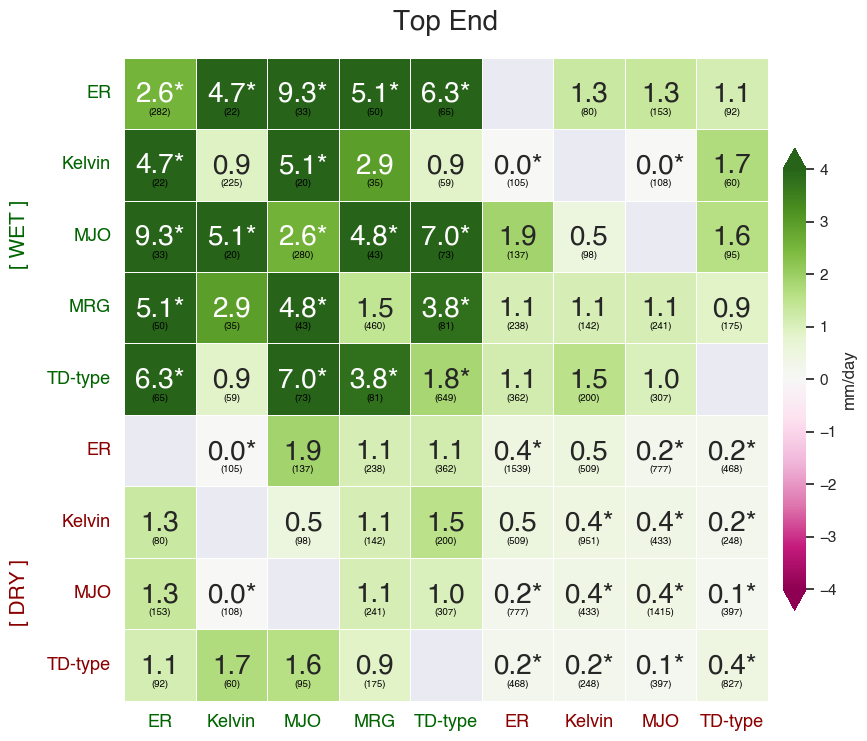

In [50]:
fig = plt.figure(figsize = [10, 10])
g = sns.heatmap(x,vmin=-4,vmax=4, 
                 annot = x_sig, 
                 annot_kws={'fontsize':20,'fontweight':1000,'va':'bottom'},
                 fmt='', 
                 linewidths = .5,
                 cmap = plt.cm.get_cmap('PiYG'), cbar_kws={
                     'label': 'mm/day', 'shrink': 0.6, 'pad':0.02, 'extend':'both'},
                square=True,
               
               )

h = sns.heatmap(n, 
                 annot = n_label, 
                 annot_kws={'fontsize':7,'fontweight':10,'va':'top','color':'black'},
                 fmt='', 
                 linewidths = .5,
#                 cmap = "white",
                alpha = 0.0,
                cbar=False,
                square=True,
               
               )

import matplotlib
for t in h.texts:
    trans = t.get_transform()
    offs = matplotlib.transforms.ScaledTranslation(0., 0.2,
                    matplotlib.transforms.IdentityTransform())
    t.set_transform( offs + trans )


g.tick_params(axis='x', colors='darkgreen')
g.tick_params(axis='y', colors='darkgreen')

for label in enumerate(g.xaxis.get_ticklabels()):
    label[1].set_fontsize(13)
    if label[0]>4:
        label[1].set_color("darkred")
  
for label in enumerate(g.yaxis.get_ticklabels()):
    label[1].set_fontsize(13)
    label[1].set_rotation(-360)
#     print(label[0])
    if label[0]>4:
        label[1].set_color("darkred")

g.text(-1.6,2.9,"[ WET ]",fontsize=15,rotation=90,color="darkgreen",weight="extra bold")
g.text(-1.6,7.9,"[ DRY ]",fontsize=15,rotation=90,color="darkred",weight="extra bold")

g.set_title("Top End", fontsize=20, pad=20)

In [51]:
x.columns
# flights_piv.columns

Index(['ER', 'Kelvin', 'MJO', 'MRG', 'TD-type', 'ER', 'Kelvin', 'MJO',
       'TD-type'],
      dtype='object')

In [52]:
droploc = x.columns.get_loc("Kelvin")
idrop = [i for i, x in enumerate(droploc) if x]
idrop

[1, 6]

Text(0.5, 1.0, 'Top End')

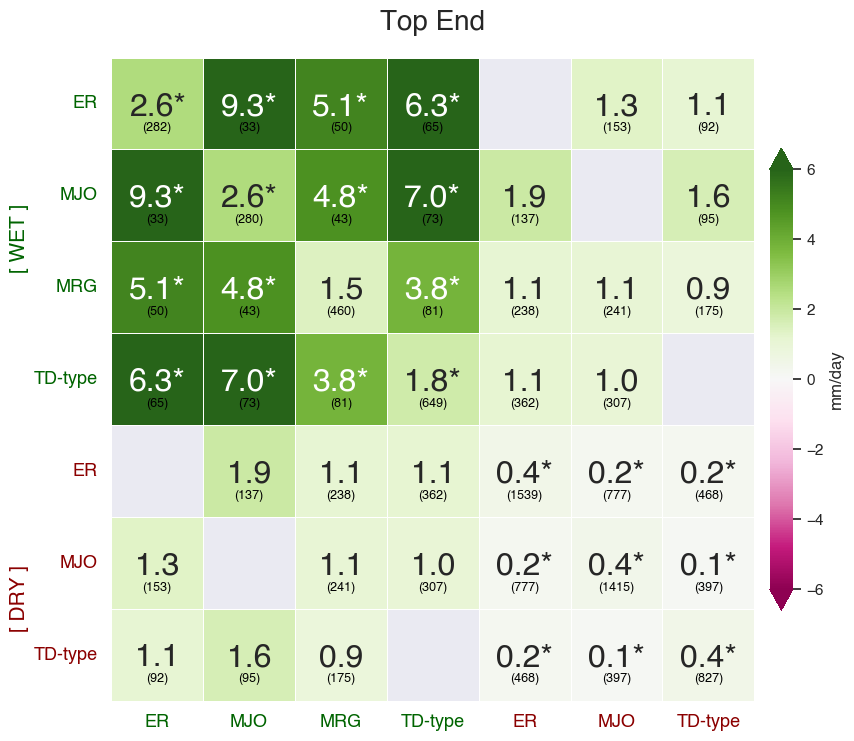

In [53]:
x2 = x.drop(x.columns[idrop], axis=1)
x2 = x2.drop(x.index[idrop])

x_sig2 = x_sig.drop(x_sig.columns[idrop], axis=1)
x_sig2 = x_sig2.drop(x_sig.index[idrop])


n_label2 = n_label.drop(n_label.columns[idrop], axis=1)
n_label2 = n_label2.drop(n_label.index[idrop])

fig = plt.figure(figsize = [10, 10])
g = sns.heatmap(x2,vmin=-6,vmax=6, 
                 annot = x_sig2, 
                 annot_kws={'fontsize':23,'fontweight':1000,'va':'bottom'},
                 fmt='', 
                 linewidths = .5,
                 cmap = plt.cm.get_cmap('PiYG'), cbar_kws={
                     'label': 'mm/day', 'shrink': 0.6, 'pad':0.02, 'extend':'both'},
                square=True,
               
               )

h = sns.heatmap(x2, 
                 annot = n_label2, 
                 annot_kws={'fontsize':9,'fontweight':10,'va':'top','color':'black'},
                 fmt='', 
                 linewidths = .5,
#                 cmap = "white",
                alpha = 0.0,
                cbar=False,
                square=True,
               
               )

import matplotlib
for t in h.texts:
    trans = t.get_transform()
    offs = matplotlib.transforms.ScaledTranslation(0., 0.2,
                    matplotlib.transforms.IdentityTransform())
    t.set_transform( offs + trans )


g.tick_params(axis='x', colors='darkgreen')
g.tick_params(axis='y', colors='darkgreen')

for label in enumerate(g.xaxis.get_ticklabels()):
    label[1].set_fontsize(13)
    if seas=='mam':
        if label[0]>3:
            label[1].set_color("darkred")
    elif seas=='djf':
        if label[0]>2:
            label[1].set_color("darkred")
  
for label in enumerate(g.yaxis.get_ticklabels()):
    label[1].set_fontsize(13)
    label[1].set_rotation(-360)
#     print(label[0])
    if seas=='mam':
        if label[0]>3:
            label[1].set_color("darkred")
    elif seas=='djf':
        if label[0]>2:
            label[1].set_color("darkred")

if seas=='djf':
    g.text(-1.1,1.7,"[ WET ]",fontsize=15,rotation=90,color="darkgreen",weight="extra bold")
    g.text(-1.1,5.2,"[ DRY ]",fontsize=15,rotation=90,color="darkred",weight="extra bold")
elif seas=='mam':
    g.text(-1.1,2.3,"[ WET ]",fontsize=15,rotation=90,color="darkgreen",weight="extra bold")
    g.text(-1.1,6.2,"[ DRY ]",fontsize=15,rotation=90,color="darkred",weight="extra bold")

g.set_title("Top End", fontsize=20, pad=20)

In [54]:
fig.savefig(diro+"combined_TE."+seas+".png",dpi=300)
fig.savefig(diro+"combined_TE."+seas+".eps", dpi=300)